In [1]:
## Load libraries
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [11]:
## Mount Google drive folder if running in Colab
if('google.colab' in sys.modules):
    from google.colab import drive
    drive.mount('/content/drive', force_remount = True)
    DIR = '/content/drive/MyDrive/Colab Notebooks/MAHE/MSIS Coursework/OddSem2023MAHE'
    DATA_DIR = DIR + '/Data/'
else:
    DATA_DIR = 'Data/'

Mounted at /content/drive


**Problem-1**: we will reconstruct missing values in a real ECG signal. To that end, first load the ECG signal data and make a component plot of the loaded ECG vector by executing the cell below. Note the missing values:

Text(0.5, 1.0, 'ECG Signal With Missing Values')

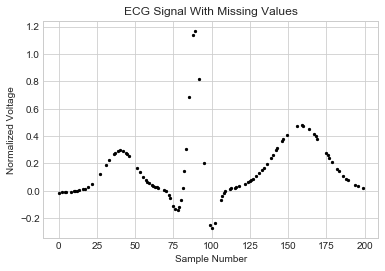

In [5]:
## Load data
# FILE = DATA_DIR + 'ecg_missing.txt'
# df_ecg = pd.read_csv(FILE, header = None, names = ['ecgvalues'])
# df_ecg['ecgvalues'] = df_ecg['ecgvalues'].astype(float)
df_ecg = pd.read_csv('ecg_missing.txt', header = None, names = ['ecgvalues'])
df_ecg['ecgvalues'] = df_ecg['ecgvalues'].astype(float)
## Component plot of the ecg signal
fig, ax = plt.subplots(1, 1, figsize = (6, 4))
component_index = range(0, len(df_ecg['ecgvalues']))
ax.scatter(component_index, df_ecg['ecgvalues'], color = 'black', marker = 'o', s = 5)
ax.set_xlabel('Sample Number')
ax.set_ylabel('Normalized Voltage')
ax.set_title('ECG Signal With Missing Values')

**Problem-1.1**: extract the indices corresponding to the missing ECG values

In [6]:
indices_unknown = df_ecg[df_ecg['ecgvalues'].isna()].index

**Problem-1.2**: extract the indices corresponding to the known ECG values

In [7]:
indices_known = df_ecg[df_ecg['ecgvalues'].notna()].index

**Problem-1.3**: build a vector of known ecg signal values

In [8]:
x_known = df_ecg['ecgvalues'][indices_known]

**Probem-1.4**: construct the matrices $S_1$ and $S_2.$

In [ ]:
I = np.eye(len(df_ecg))
S1 = I[?,?]
S2 = I[?,?]

In [16]:
I = np.eye(len(df_ecg))
I.shape

(200, 200)

**Problem-1.5**: build the matrix $D$

In [47]:
n = len(df_ecg) # size of the signal
a = 1*np.ones(n-1)
b = (-2)*np.ones(n)
D = np.diag(a, -1) + np.diag(b,) + np.diag(a, 1)
D = D[2:6, 1:7]
D

array([[ 1., -2.,  1.,  0.,  0.,  0.],
       [ 0.,  1., -2.,  1.,  0.,  0.],
       [ 0.,  0.,  1., -2.,  1.,  0.],
       [ 0.,  0.,  0.,  1., -2.,  1.]])

Reconstruct the missing values such that the resulting ECG signal is smooth (we will do this part during the lab session).

**Problem-2**: consider an $n$-vector $x$ of time series values. The following code snippet simulates such as vector. Try three different cycle frequency values (0.5, 1.0, 2.0) in the variable f below and observe what happens to the component plot of the vector.

Text(0.5, 1, 'Time series data')

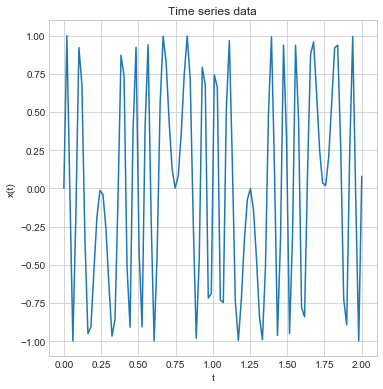

In [50]:
t_start = 0 # start time in sec
t_end = 2 # end time in sec
t = np.linspace(t_start, t_end+1e-03, 100) # timestamps
f = 2.0  # cycle frequency
omega = 2 * np.pi * f # angular frequency
x = np.sin(omega*np.sin(0.5*omega*t))
fig, ax2 = plt.subplots(1, 1, figsize = (6, 6))
fig.tight_layout(pad = 4.0)
ax2.plot(t, x,)
ax2.set_xlabel('t')
ax2.set_ylabel('x(t)')
ax2.set_title('Time series data')

**Problem 2.1**: In order to measure how rough or wiggly a signal represented by a vector is, we measure the so called *Dirichlet energy* of the signal which for the vector $x$ we saw above is defined as:

$$(x_2-x_1)^2+(x_3-x_2)^2+\cdots+(x_{100}-x_{99})^2.$$

Calculate the Dirichlet energy of the vector $x$ for the three different frequency values mentioned above. How do the values compare to each other?

Use the following clue:

Dirichlet energy of $x = \lVert Dx\lVert_2^2,$ where $D$ is the matrix $$\begin{bmatrix}-1 & ? & ? &\cdots&?&?\\0 & ? & 1 &\cdots&?&?\\? & ? & ? &\cdots&?&?\\ &  & \vdots &\vdots&&\\? & ? & ? &\cdots&-1&?\end{bmatrix}.$$

In [51]:
import numpy as np

# Define the frequency values
f_values = [0.5, 1.0, 2.0]

# Initialize an array to store Dirichlet energies
dirichlet_energies = []

for f in f_values:
    # Define the time vector t and angular frequency omega
    t_start = 0
    t_end = 2
    t = np.linspace(t_start, t_end + 1e-03, 100)
    omega = 2 * np.pi * f
    
    # Generate the signal x
    x = np.sin(omega * np.sin(0.5 * omega * t))
    
    # Define the matrix D
    n = len(x)
    D = np.diag(-np.ones(n)) + np.diag(np.ones(n-1), k=1)
    
    # Calculate the gradient Dx
    Dx = np.dot(D, x)
    
    # Calculate the Dirichlet energy
    energy = np.linalg.norm(Dx, ord=2)**2
    dirichlet_energies.append(energy)

# Print the Dirichlet energies for each frequency value
for i, f in enumerate(f_values):
    print(f"Frequency {f}: Dirichlet Energy = {dirichlet_energies[i]}")


Frequency 0.5: Dirichlet Energy = 0.22980335946318184
Frequency 1.0: Dirichlet Energy = 3.808482132027573
Frequency 2.0: Dirichlet Energy = 53.163339147636904
